<a href="https://colab.research.google.com/github/Bang-JW/kaggle_study/blob/main/kaggle_study_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part1. E-commerce Data EDA


 - Customer care calls : 배송조회 문의전화 건수

In [1]:
! pip install category_encoders

     |████████████████████████████████| 80 kB 9.4 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# 분석과 관련없는 ID 컬럼을 Index로 설정

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle_Study/data.csv")
data = data.set_index('ID')

In [4]:
data.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


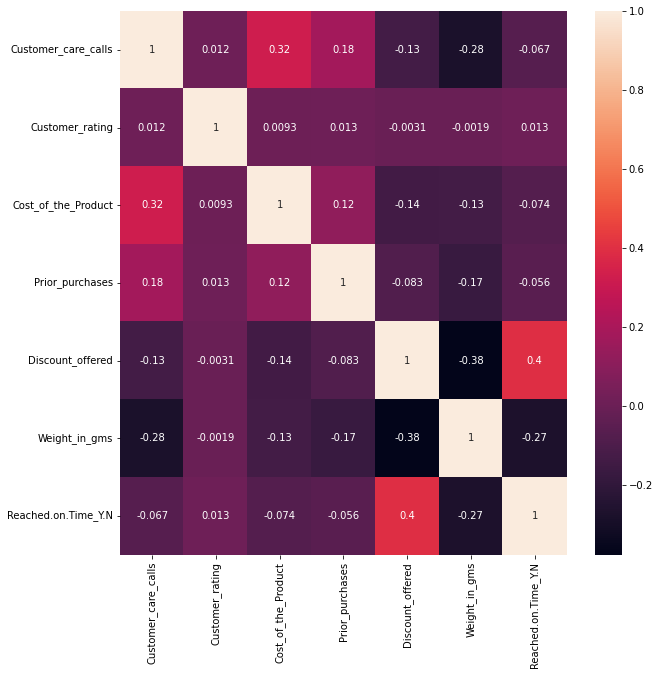

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [6]:
corr_df = data.corr()

In [7]:
np.abs(corr_df)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,0.130750,0.276615,0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,0.003124,0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,0.138312,0.132604,0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,0.082769,0.168213,0.055515
Discount_offered,0.130750,0.003124,0.138312,0.082769,1.000000,0.376067,0.397108
Weight_in_gms,0.276615,0.001897,0.132604,0.168213,0.376067,1.000000,0.268793
Reached.on.Time_Y.N,0.067126,0.013119,0.073587,0.055515,0.397108,0.268793,1.000000


In [8]:
corr_df[(np.abs(corr_df) > 0.2) & (corr_df < 1)]

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,NaN,NaN,0.323182,NaN,NaN,-0.276615,NaN
Customer_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cost_of_the_Product,0.323182,NaN,NaN,NaN,NaN,NaN,NaN
Prior_purchases,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount_offered,NaN,NaN,NaN,NaN,NaN,-0.376067,0.397108
Weight_in_gms,-0.276615,NaN,NaN,NaN,-0.376067,NaN,-0.268793
Reached.on.Time_Y.N,NaN,NaN,NaN,NaN,0.397108,-0.268793,NaN


- 양의 상관관계가 의미 있는 set(절댓값이 0.2 이상)

  1. Customer_care_calls, Cost_of_the_Product(0.32)
  2. Discount_offered, Reached.on.Time_Y.N(0.39)

---------------------------------------------------------

- 음의 상관관계가 의미 있는 set(절댓값이 0.2 이상)

  1. Customer_care_calls, Weight_in_gms(-0.27)
  2. Discount_offered, Weight_in_gms(-0.37)
  3. Reached.on.Time_Y.N, Weight_in_gms(-0.26)

## 배송문의 전화, 가격의 관계

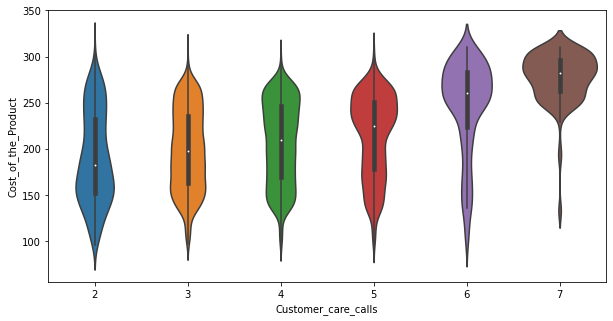

In [9]:
plt.figure(figsize=(10,5))
sns.violinplot(x=data['Customer_care_calls'], y = data['Cost_of_the_Product'])

배송문의 전화가 많을수록 상품의 가격은 높은 것을 알 수 있다.

## 할인율과 물건이 제때 도착하는지

- 할인율이 높을수록 제 때에 도착할까? **그렇지 않다..? 할인율이 높으면 제 때 도착하지 않는다.**
- 1은 제때 도착하지 않음, 0은 제때 도착


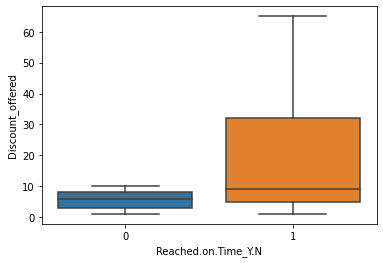

In [10]:
sns.boxplot(data = data, x = 'Reached.on.Time_Y.N', y = 'Discount_offered' )

In [11]:
print("제 때 도착하지 않는 물건의 할인율 평균: ", data[data['Reached.on.Time_Y.N']==1]['Discount_offered'].mean())

제 때 도착하지 않는 물건의 할인율 평균:  18.663720859363096


In [12]:
print("제 때 도착하는 물건의 할인율 평균: ", data[data['Reached.on.Time_Y.N']==0]['Discount_offered'].mean())

제 때 도착하는 물건의 할인율 평균:  5.545987376014428


In [13]:
stats.ttest_ind(data[data['Reached.on.Time_Y.N']==1]['Discount_offered'], data[data['Reached.on.Time_Y.N']==0]['Discount_offered'])

Ttest_indResult(statistic=45.3744750332705, pvalue=0.0)

두 개의 평균에는 차이가 있다.

## 물건의 무게와 몇 가지 특성의 관계(배송문의전화, 할인율, 제때 도착여부)

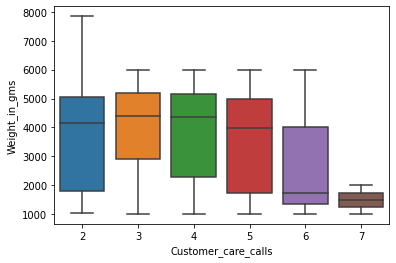

In [57]:
# 무게와 배송 문의 전화
sns.boxplot(x = 'Customer_care_calls', y = 'Weight_in_gms', data = data)

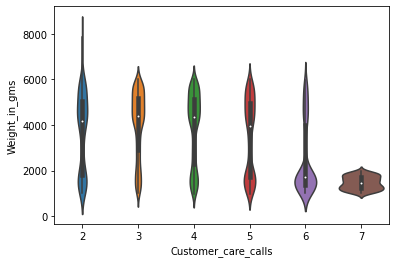

In [59]:
sns.violinplot(x = 'Customer_care_calls', y = 'Weight_in_gms', data = data)

배송 문의 전화가 많을 수록 낮은 무게의 물건이 좀 더 많다.

 - 무게가 많이 나갈 수록 배송 문의 전화가 많은가?
 그렇지 않다.

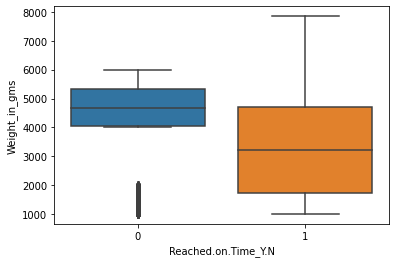

In [16]:
# 무게와 물건이 제 때 도착하는지에 대한 관계
sns.boxplot(x= data['Reached.on.Time_Y.N'], y = data['Weight_in_gms'])

무거운 물건은 제 때 도착할 가능성이 높다.



무게가 가벼운 물건은 제 때 도착할 가능성이 낮다.







## 블록별 운송수단 비율


In [17]:
warehouse_A = data.groupby('Warehouse_block').get_group('A')
warehouse_B = data.groupby('Warehouse_block').get_group('B')
warehouse_C = data.groupby('Warehouse_block').get_group('C')
warehouse_D = data.groupby('Warehouse_block').get_group('D')
warehouse_F= data.groupby('Warehouse_block').get_group('F')

In [18]:
print("Warehouse A:\n ", warehouse_A['Mode_of_Shipment'].value_counts(normalize = True))
print("Warehouse B:\n ",warehouse_B['Mode_of_Shipment'].value_counts(normalize = True))
print("Warehouse C:\n ",warehouse_C['Mode_of_Shipment'].value_counts(normalize = True))
print("Warehouse D:\n ",warehouse_D['Mode_of_Shipment'].value_counts(normalize = True))
print("Warehouse F:\n ",warehouse_F['Mode_of_Shipment'].value_counts(normalize = True))

Warehouse A:
  Ship      0.677578
Flight    0.162029
Road      0.160393
Name: Mode_of_Shipment, dtype: float64
Warehouse B:
  Ship      0.678123
Flight    0.161484
Road      0.160393
Name: Mode_of_Shipment, dtype: float64
Warehouse C:
  Ship      0.678669
Flight    0.160938
Road      0.160393
Name: Mode_of_Shipment, dtype: float64
Warehouse D:
  Ship      0.678844
Flight    0.161941
Road      0.159215
Name: Mode_of_Shipment, dtype: float64
Warehouse F:
  Ship      0.678669
Flight    0.161484
Road      0.159847
Name: Mode_of_Shipment, dtype: float64


([<matplotlib.patches.Wedge at 0x7f6d29dc1150>,
 [Text(-0.585520337921849, 0.9312174471517831, 'Ship'),
  Text(0.0650049264682365, -1.0980775744613216, 'Flight'),
  Text(0.9641915474334185, -0.5294663916226885, 'Road')],
 [Text(-0.3193747297755539, 0.507936789355518, '67.9%'),
  Text(0.03545723261903808, -0.59895140425163, '16.1%'),
  Text(0.52592266223641, -0.2887998499760119, '16.0%')])

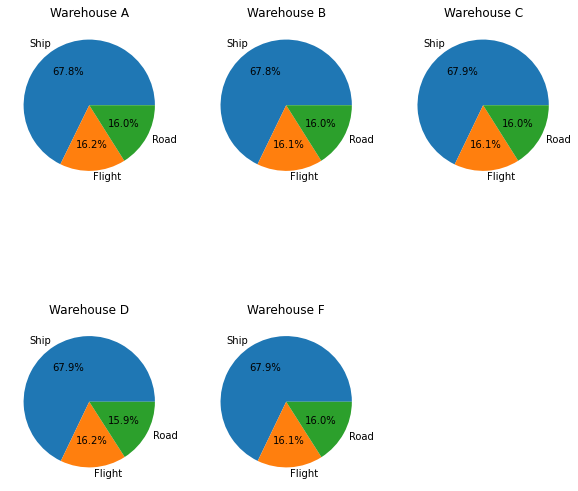

In [86]:
A_label = warehouse_A['Mode_of_Shipment'].value_counts().index
B_label = warehouse_B['Mode_of_Shipment'].value_counts().index
C_label = warehouse_C['Mode_of_Shipment'].value_counts().index
D_label = warehouse_D['Mode_of_Shipment'].value_counts().index
F_label = warehouse_F['Mode_of_Shipment'].value_counts().index

plt.figure(figsize = (10,10))

plt.subplot(2,3,1)
plt.title('Warehouse A')
plt.pie(warehouse_A['Mode_of_Shipment'].value_counts(normalize=True), labels = A_label, autopct='%.1f%%')

plt.subplot(2,3,2)
plt.title('Warehouse B')
plt.pie(warehouse_B['Mode_of_Shipment'].value_counts(normalize=True), labels = B_label, autopct='%.1f%%')

plt.subplot(2,3,3)
plt.title('Warehouse C')
plt.pie(warehouse_C['Mode_of_Shipment'].value_counts(normalize=True), labels = C_label, autopct='%.1f%%')

plt.subplot(2,3,4)
plt.title('Warehouse D')
plt.pie(warehouse_D['Mode_of_Shipment'].value_counts(normalize=True), labels = D_label, autopct='%.1f%%')

plt.subplot(2,3,5)
plt.title('Warehouse F')
plt.pie(warehouse_F['Mode_of_Shipment'].value_counts(normalize=True), labels = F_label, autopct='%.1f%%')

각 창고는 운송수단의 비율이 비슷하게 분포되어 있는 것을 알 수 있다.

## 중요도별 창고 비율

low, med, high 의 비율을 창고별로 살펴본다.

In [19]:
data['Product_importance'].value_counts(normalize=True)

low       0.481589
medium    0.432221
high      0.086190
Name: Product_importance, dtype: float64

In [26]:
importance_low = data.groupby('Product_importance').get_group('low')
importance_medium = data.groupby('Product_importance').get_group('medium')
importance_high = data.groupby('Product_importance').get_group('high')

In [27]:
importance_low['Warehouse_block'].value_counts()

F    1776
A     909
D     883
C     874
B     855
Name: Warehouse_block, dtype: int64

In [28]:
importance_medium['Warehouse_block'].value_counts()

F    1587
B     832
C     791
D     785
A     759
Name: Warehouse_block, dtype: int64

In [29]:
importance_high['Warehouse_block'].value_counts()

F    303
C    168
D    166
A    165
B    146
Name: Warehouse_block, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6d292a2790>,
 [Text(0.5905170798705573, 0.9280568831602674, 'F'),
  Text(-0.9221403389250472, 0.5997142614005433, 'C'),
  Text(-0.9489617536827326, -0.5563017077516418, 'D'),
  Text(0.06193740854788066, -1.098254869063813, 'A'),
  Text(0.9737408382595168, -0.5116920752812708, 'B')],
 [Text(0.32210022538394034, 0.5062128453601458, '32.0%'),
  Text(-0.502985639413662, 0.32711686985484173, '17.7%'),
  Text(-0.5176155020087632, -0.3034372951372591, '17.5%'),
  Text(0.03378404102611672, -0.5990481103984434, '17.4%'),
  Text(0.5311313663233728, -0.27910476833523856, '15.4%')])

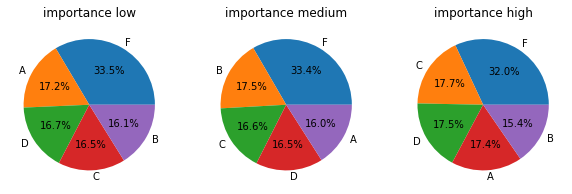

In [87]:
plt.figure(figsize = (10,10))

plt.subplot(1,3,1)
plt.title('importance low')
plt.pie(importance_low['Warehouse_block'].value_counts(normalize=True), labels = importance_low['Warehouse_block'].value_counts().index, autopct='%.1f%%' )

plt.subplot(1,3,2)
plt.title('importance medium')
plt.pie(importance_medium['Warehouse_block'].value_counts(normalize=True), labels = importance_medium['Warehouse_block'].value_counts().index, autopct='%.1f%%')

plt.subplot(1,3,3)
plt.title('importance high')
plt.pie(importance_high['Warehouse_block'].value_counts(normalize=True), labels = importance_high['Warehouse_block'].value_counts().index , autopct='%.1f%%')

## 무게에 따라서 운송수단이 달라질까?


In [30]:
flight_data = data[data['Mode_of_Shipment']=='Flight']
road_data = data[data['Mode_of_Shipment']=='Road']
ship_data = data[data['Mode_of_Shipment']=='Ship']

In [31]:
flight_data = flight_data.loc[:,['Weight_in_gms']]
road_data = road_data.loc[:,['Weight_in_gms']]
ship_data = ship_data.loc[:,['Weight_in_gms']]

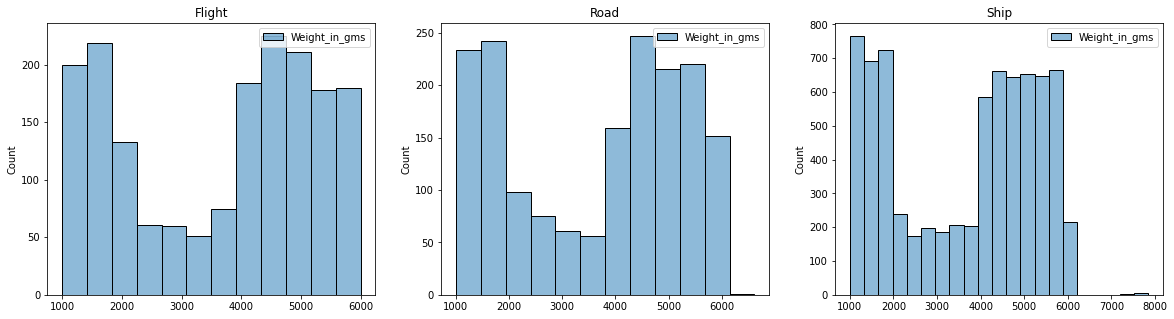

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Flight")
sns.histplot(flight_data)

plt.subplot(1,3,2)
plt.title("Road")
sns.histplot(road_data)

plt.subplot(1,3,3)
plt.title("Ship")
sns.histplot(ship_data)

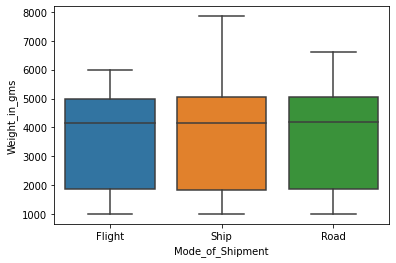

In [33]:
sns.boxplot(x='Mode_of_Shipment', y='Weight_in_gms', data=data)

In [34]:
stats.f_oneway(flight_data, road_data, ship_data)

F_onewayResult(statistic=array([0.09566634]), pvalue=array([0.90876794]))

p-value가 0.9 이므로 세 그룹의 평균에 차이가 없다고 볼 수 있음

# Part2 Machine Learning


## 모든 컬럼 포함하여 제 시간에 도착하는지 여부 예측

In [35]:
# 기준모델 
data['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [36]:
feature =data.columns[:-1]
target = data.columns[-1]

X = data[feature]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [37]:
randomforest_pipeline = make_pipeline(
    OrdinalEncoder(),
    #OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(max_depth = 5)
)

randomforest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                      'Product_importance', 'Gender'],
                                mapping=[{'col': 'Warehouse_block',
                                          'data_type': dtype('O'),
                                          'mapping': D      1
F      2
B      3
A      4
C      5
NaN   -2
dtype: int64},
                                         {'col': 'Mode_of_Shipment',
                                          'data_type': dtype('O'),
                                          'mapping': Road      1
Ship      2
Flight    3
NaN      -2
dtype: int64},
                                         {'col': 'Product_importance',
                                          'data_type': dtype('O'),
                                          'mapping': medium    1
low       2
high      3
NaN      -2
dtype: int64},
                                         {'col': 'Gend

In [38]:
randomforest_pipeline.score(X_train, y_train)

0.6987157631549039

In [39]:
randomforest_pipeline.score(X_test, y_test)

0.6672727272727272

## 일부 feature 만 사용하여 상품 도착 여부 예측

▶ train score 0.8


▶ test score 0.63 

 이 결과는 과적합이라고 볼 수 있을까요?? 



In [40]:
# featurn 및 target 설정

feature = [ 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Discount_offered', 'Product_importance']
target = data.columns[-1]

In [41]:
X = data[feature]
y = data[target]

In [42]:
# 기준모델 
data['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [44]:
randomforest_pipeline = make_pipeline(
    OrdinalEncoder(),
    #OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(max_depth = 10)
)

randomforest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Product_importance'],
                                mapping=[{'col': 'Product_importance',
                                          'data_type': dtype('O'),
                                          'mapping': medium    1
low       2
high      3
NaN      -2
dtype: int64}])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10))])

In [45]:
randomforest_pipeline.score(X_train, y_train)

0.7857711103534493

In [46]:
randomforest_pipeline.score(X_test, y_test)

0.6295454545454545

In [47]:
y_pred = randomforest_pipeline.predict(X_test)

In [48]:
acc = accuracy_score(y_test, y_pred)
print("정확도 : {:.2f}".format(acc))

정확도 : 0.63


## 중요도에 따른 가격예측

In [49]:
importance_data = data.loc[:,['Product_importance', 'Cost_of_the_Product']]

In [50]:
feature = ['Product_importance']
target = ['Cost_of_the_Product']

X = importance_data[feature]
y = importance_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [51]:
onehot_enc = OneHotEncoder(use_cat_names=True)
X_train_encoded = onehot_enc.fit_transform(X_train)
X_test_encoded = onehot_enc.transform(X_test)

In [52]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train_encoded, y_train)

LinearRegression()

In [53]:
y_pred = linreg.predict(X_test_encoded)

In [54]:
y_pred = pd.DataFrame(y_pred, columns = ['Prediction'])

In [55]:
y_test

,Cost_of_the_Product
ID,
1230,119
9223,231
9646,176
9522,234
7198,150
...,...
10766,274
2071,272
3746,205


In [56]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test, y_pred)) 
print(mean_squared_error(y_test, y_pred)) 

0.00036072801485143025
2353.049211647727


큰 의미가 있는 모델은 아닌 것 같습니다.